In [5]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


In [6]:
def dataset_reader(datafile):
    
    return pd.read_csv(datafile)

In [7]:
df1=dataset_reader('housing.csv')
df2=dataset_reader('concreteData.csv')
df3=dataset_reader('yachtData.csv')

In [69]:
class LinearRegression:
    
    def __init__(self,X,y,learningRate,tolerance,lamda,maxIteration=50000,error='rmse',gd=False,sgd=False):
        
        self.X=X
        self.y=y
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.error=error
        self.gd=gd
        self.lamda=lamda
        self.sgd=sgd
        
    def splitTraintest(self):
        
        X_train,X_test,y_train,y_test=train_test_split(self.X,self.y,test_size=0.2,random_state=0)
        
        return  X_train,X_test,y_train,y_test
    
    def add_x0(self,X):
        
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def normalize(self,X):
        
        mean=np.mean(X)
        std=np.std(X)
        X_norm=(X-mean)/std
        X_norm=self.add_x0(X_norm)
        
        return X_norm,mean,std
    
    def normalizeTestData(self,X_test,train_mean,train_std):
        
        X_norm=(X_test-train_mean)/train_std
        X_norm=self.add_x0(X_norm)
        
        return X_norm
    
    def rank(self,X,eps=1e-12):
        
        u,s,vh=np.linalg.svd(X)
        
        return len([x for x in s if abs(s) >eps])
    
    def checkMatrix(self,X):
        
        X_rank=np.linalg.matrix_rank(X)
        
        if X_rank==min(X.shape[0],X.shape[1]):
            
            self.full_rank=True
            print("Data is Full Rank")
            
        else:
            self.full_rank=False
            print("Data is not Full Rank")
            
    def checkInvertibility(self,X):
        if X.shape[0]<X.shape[1]:
                self.lowRank=True
                print("Matrix is Low Rank")
                
        else:
                self.lowRank=False
                print("Matrix is not Low Rank")
                
    def closedFormSolution(self,X,y):
            
            sizeofi=X.T.dot(X)
            identity=np.eye(sizeofi.shape[0],sizeofi.shape[1])
            self.theta=np.linalg.inv(X.T.dot(X)+self.lamda*identity).dot(X.T).dot(y)
            return self.theta
    
    
    def gradientDescent(self,X,y):
        
        self.errors=[]
        last_error=float('inf')
        
        for t in tqdm(range(self.maxIteration)):
            self.theta=self.theta-self.learningRate * (self.cost_derivative(X,y)+(self.lamda*self.theta))
            
            if self.error=='rmse':
                current_error=self.rmse(X,y)
            else:
                current_error=self.sse(X,y)
                
            error_difference=last_error-current_error
            last_error=current_error
        
            self.errors.append(current_error)
           
            if error_difference<self.tolerance:
                print("The model stopped learning - Converged")
                break
                
        return  self.plot_function(self.errors)
    
    def stochasticgradientDescent(self,X,y):
        
        self.errors=[]
        last_error=float('inf')
        
        for t in tqdm(range(self.maxIteration)):
            index=[random.randint(0,X.shape[0]-1) for i in np.arange(1,100,1)]
            X=X[index]
            y=y[index]
            
            b=0.0000001
            c=0.001
        
            alphat=b/(t+c)
           
            self.theta=self.theta-alphat * (self.cost_derivative(X,y)+(self.lamda*self.theta))
            
            if self.error=='rmse':
                current_error=self.rmse(X,y)
            else:
                current_error=self.sse(X,y)
                
            error_difference=last_error-current_error
            last_error=current_error
        
            self.errors.append(current_error)
           
            if abs(error_difference)<self.tolerance:
                print("The model stopped learning - Converged")
                break
        return  self.plot_function(self.errors)
    
    def predict(self,X):
        
        return X.dot(self.theta)
    
    def sse(self,X,y):
        
        y_hat=self.predict(X)
        return((y_hat-y)**2).sum()
    
    def rmse(self,X,y):
        
        return np.sqrt(self.sse(X,y)/X.shape[0])
    
    def cost_derivative(self,X,y):
        y_hat=self.predict(X)
        grad=(y_hat-y).dot(X)
        return grad
    
    def plot_function(self,datatoplot):
        
        return plt.plot(datatoplot)
    
    def run_model(self):
        
        self.X_train,self.X_test,self.y_train,self.y_test=self.splitTraintest()
        
        self.X_train,self.mean,self.std=self.normalize(self.X_train)
        self.X_test=self.normalizeTestData(self.X_test,self.mean,self.std)
        
        self.checkMatrix(self.X_train)
        self.checkInvertibility(self.X_train)
        
        if self.full_rank and not self.lowRank and self.X_train.shape[0]<=10000 and not self.gd and not self.sgd:
            self.theta=self.closedFormSolution(self.X_train,self.y_train)
            
        elif self.gd:
            self.theta=np.ones(self.X_train.shape[1],dtype=np.float64)*0
            self.gradientDescent(self.X_train,self.y_train)
            
        elif self.sgd:
            self.theta=np.ones(self.X_train.shape[1],dtype=np.float64)*0
            self.stochasticgradientDescent(self.X_train,self.y_train)
            
        print(self.theta)
        
      
    
        

In [70]:
regression=LinearRegression(df1.values[:,0:-1],df1.values[:,-1],learningRate=0.00001,tolerance=0.0000001,lamda=1,error='rmse',sgd=True)

  1%|          | 280/50000 [00:00<00:18, 2723.33it/s]

Data is Full Rank
Matrix is not Low Rank


 18%|█▊        | 8911/50000 [00:02<00:13, 3159.92it/s]


The model stopped learning - Converged
[ 0.22406179 -0.10524228 -0.08686168 -0.09293171 -0.10809833 -0.10740399
 -0.09824598 -0.01247339 -0.10207274 -0.09648295  0.46065139 -0.08066379
  0.46209884 -0.09235245]


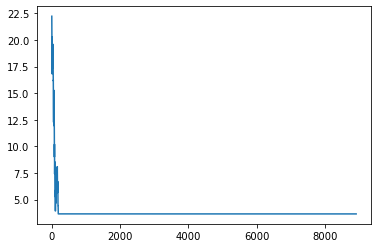

In [71]:
regression.run_model()

In [72]:
regression.sse(regression.X_test,regression.y_test)

45948.10720306067

In [73]:
regression.rmse(regression.X_test,regression.y_test)

21.32912924818426

In [74]:
regression.predict(regression.X_test)

array([2.33167856, 2.35577231, 3.50446614, 2.36266749, 3.56175232,
       2.42508791, 2.43994787, 3.54313666, 2.56870514, 2.5051025 ,
       2.31581625, 2.42643776, 2.4333001 , 2.43428256, 2.41859033,
       2.50358896, 3.42007232, 2.24498867, 1.76271149, 2.35765057,
       2.34561133, 3.54363276, 3.56612595, 2.67333973, 2.22055378,
       3.31757125, 2.44410016, 3.4448805 , 2.36253924, 2.43316701,
       3.55436789, 2.83043629, 2.02466496, 2.34519216, 2.35083562,
       3.42632756, 2.43802481, 2.46171505, 2.15665622, 2.70536699,
       2.39214278, 2.19924959, 3.29479508, 2.4064981 , 2.70910086,
       2.24008146, 2.31202632, 2.73904958, 2.30339768, 2.68530831,
       2.71612726, 2.59330127, 2.43820287, 2.0252862 , 2.82564273,
       2.45338178, 2.41885641, 2.41158979, 3.31050519, 2.0636821 ,
       2.73950923, 2.16325257, 3.50463033, 2.55317728, 2.1594953 ,
       2.49191662, 2.45560004, 2.86206289, 2.37988053, 2.66311823,
       2.7387015 , 2.50718875, 2.5998723 , 2.18347217, 2.41244